In [341]:
# The following two lines are only necessary to run once.
# Comment out otherwise for speed-up.
from google.cloud.bigquery import Client, QueryJobConfig
client = Client()

query = """SELECT
*
FROM `hacka-1.dataset.view_dados_hacka`
WHERE Sub_Produto in ('CDC VEICULOS DE PASSEIO','PRE APROVADO CDC VEICULOS DE PASSEIO','REFINANCIAMENTO VEICULOS DE PASSEIO')
AND QtParcelas in (24, 36, 48, 54, 60)
AND QtCilindradaVeiculo > 995
AND QtCilindradaVeiculo < 3000
AND QtQuilometragemVeiculo < 150000
AND AaFabricacaoVeiculo >= 2008
AND AaFabricacaoVeiculo <= 2019
AND CX_Busca_Informacoes_6m is not null
"""

#ID,
#fl_renovou,
#CX_Busca_Informacoes_6m,
#NV_CX_Atendimento_Diferenciado_6m, 
#GC_OfertaNegociacao_3m

#where (CdOcupacaoCBO = '2684' OR CdOcupacaoCBO = '7897' OR CdOcupacaoCBO = '5411')
#and (CdUfNaturalidade = 'Sudeste' OR CdUfNaturalidade = 'Nordeste')
#and (CdMarca = 'VOLKSWAGEN' OR CdMarca = 'CHEVROLET' OR CdMarca = 'FIAT')
#ID, 
#PL_Sem_Condicoes_3m,
#PL_Sem_Condicoes_6m,
#NmMotivoContratoFinanceiro,
#CdUfNaturalidade,
#Grupo_Etario,
#VrRenda,
#Sub_Produto,
#flmat30conta,
#VrContrato,
#VrFinanciamento,
#VrEntrada,
#QtParcelas,
#AaFabricacaoVeiculo,
#CdMarca,
#VrMercado,
#FlZeroKm,
#QtCilindradaVeiculo,
#QtQuilometragemVeiculo,
#CdOcupacaoCBO,
#QtAnoIdade, 
#fl_renovou,
#duracao_segundos 
#and (CdMarca = 'VOLKSWAGEN')
# OR CdOcupacaoCBO = '7897' OR CdOcupacaoCBO = '5411'
# OR CdUfNaturalidade = 'Nordeste'

job = client.query(query)
df = job.to_dataframe()

In [314]:
df.shape

(837, 4)

In [342]:
df.head()

,ID,Capacidade_de_Pagamento_7,tempo_desde_primeiro_contrato,tempo_desde_ultimo_contrato,QTD_SEGURO,QTD_OUTROS,QTD_CP_CONSIGNADO,QTD_CDCCG,QTD_CONTA_DIGITAL,QTD_CARTAO,...,GC_OfertaNegociacao_3m,CD_Boleto_3m,CX_Cliente_NaoCompreende_3m,PL_Sem_Condicoes_3m,NV_DC10_Cliente_alega_pagamento_3m,NV_FC_NEGOCIACAO_COM_SUCESSO_3m,NV_BP4_Informa_o_desconto_3m,Duracao_segundos,fl_renovou,VrFinanciamento
0,130,8,247.0,246.0,7,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-0.691800
1,290,4,4003.0,252.0,4,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.045869
2,425,8,470.0,220.0,4,0,0,1,0,1,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0,1.245162
3,498,3,306.0,253.0,4,0,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132.0,1,-0.738553
4,858,8,262.0,195.0,7,0,0,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0,-0.944490


In [ ]:
df.count()/len(df.index)

ID                            1.000000
NmMotivoContratoFinanceiro    1.000000
CdUfNaturalidade              1.000000
Grupo_Etario                  1.000000
VrRenda                       0.999142
Sub_Produto                   1.000000
VrContrato                    1.000000
VrFinanciamento               1.000000
VrEntrada                     0.997582
QtParcelas                    1.000000
AaFabricacaoVeiculo           0.999688
CdMarca                       1.000000
VrMercado                     0.999922
FlZeroKm                      1.000000
QtCilindradaVeiculo           0.998986
QtQuilometragemVeiculo        0.975201
CdOcupacaoCBO                 1.000000
QtAnoIdade                    0.999688
fl_renovou                    1.000000
duracao_segundos              0.416517
dtype: float64

In [321]:
df_subprod = df.groupby(by=['CX_Busca_Informacoes_6m','fl_renovou']).ID.count().unstack().reset_index()
df_subprod['perc'] = df_subprod[1]/(df_subprod[0]+df_subprod[1])*100
df_subprod

#fl_renovou	FL_KIDS_F1	0	1	perc
#0	0.0	19646	745	3.653573
#1	1.0	585	39	6.250000 > OBS. A porcentagem de renovações é o dobro quando tem criança no nível 

#fl_renovou	FL_MATERIAL_DE_CONSTRUCAO_F1	0	1	perc
#0	0.0	19150	712	3.584735
#1	1.0	1113	74	6.234204

fl_renovou,CX_Busca_Informacoes_6m,0,1,perc
0,1.0,826,11,1.314217


In [283]:
df_subprod = df.groupby(by=['CdMarca','fl_renovou']).ID.count().unstack().reset_index()
df_subprod['perc'] = df_subprod[1]/(df_subprod[0]+df_subprod[1])*100
df_subprod

fl_renovou,CdMarca,0,1,perc
0,CHEVROLET,1910,111,5.492331
1,FIAT,2005,64,3.093282
2,VOLKSWAGEN,2839,84,2.873760


<AxesSubplot:xlabel='CdMarca'>

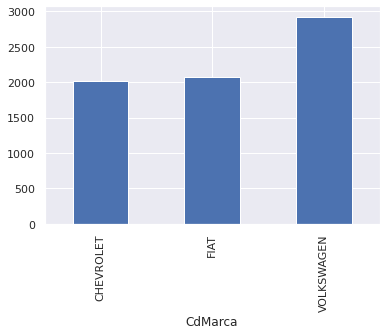

In [284]:
df.groupby(by='CdMarca').ID.count().plot(kind='bar')

In [324]:
df_subprod = df.groupby(by=['CdMarca','fl_renovou']).ID.count().unstack().reset_index()
df_subprod['perc'] = df_subprod[1]/(df_subprod[0]+df_subprod[1])*100
df_subprod

fl_renovou,CdMarca,0,1,perc
0,,1.0,NaN,NaN
1,CHEVROLET,109.0,2.0,1.801802
2,CITROEN,47.0,NaN,NaN
3,FIAT,107.0,NaN,NaN
4,FORD,54.0,1.0,1.818182
5,HONDA,43.0,1.0,2.272727
6,HYUNDAI,79.0,1.0,1.250000
7,JEEP,10.0,NaN,NaN
8,KIA,10.0,NaN,NaN
9,MERCEDES-BENZ,1.0,NaN,NaN


In [286]:
df_subprod = df.groupby(by=['QtParcelas','fl_renovou']).ID.count().unstack().reset_index()
df_subprod['perc'] = df_subprod[1]/(df_subprod[0]+df_subprod[1])*100
df_subprod

fl_renovou,QtParcelas,0,1,perc
0,12,1.0,NaN,NaN
1,13,15.0,NaN,NaN
2,14,15.0,2.0,11.764706
3,15,1.0,NaN,NaN
4,17,2.0,NaN,NaN
5,20,1.0,NaN,NaN
6,24,198.0,14.0,6.603774
7,25,7.0,NaN,NaN
8,26,4.0,1.0,20.000000
9,27,5.0,NaN,NaN


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


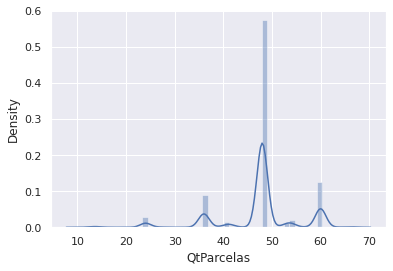

In [ ]:
import seaborn as sns, numpy as np
sns.set_theme(); np.random.seed(0)
x = df.QtParcelas
ax = sns.distplot(x)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


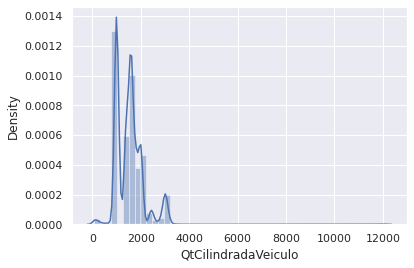

In [ ]:
x = df.QtCilindradaVeiculo
ax = sns.distplot(x)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


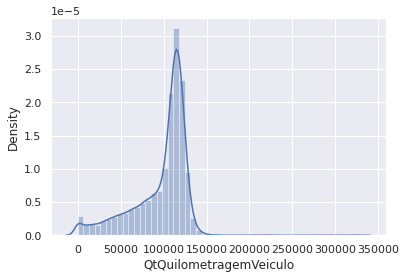

In [ ]:
x = df.QtQuilometragemVeiculo
ax = sns.distplot(x)

<AxesSubplot:xlabel='QtAnoIdade'>

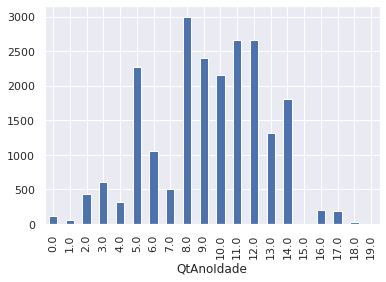

In [ ]:
df.groupby(by='QtAnoIdade').ID.count().plot(kind='bar')

<AxesSubplot:xlabel='AaFabricacaoVeiculo'>

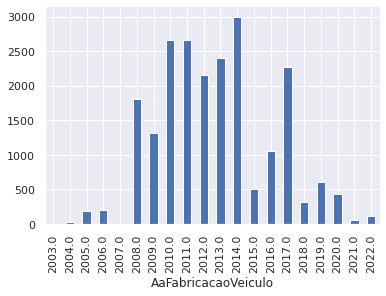

In [ ]:
df.groupby(by='AaFabricacaoVeiculo').ID.count().plot(kind='bar')

<AxesSubplot:xlabel='CdMarca'>

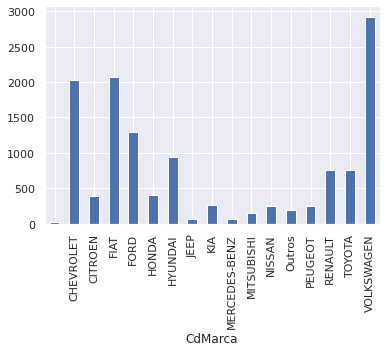

In [ ]:
df.groupby(by=['CdMarca']).ID.count().plot(kind='bar')

<AxesSubplot:xlabel='Sub_Produto'>

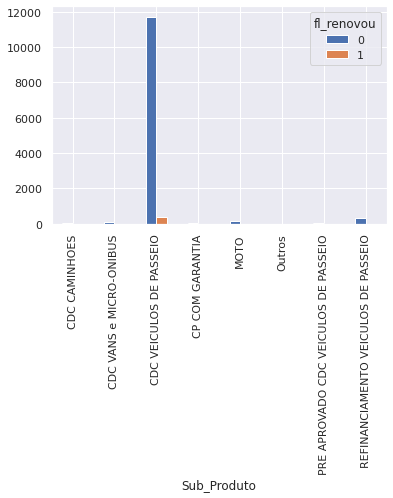

In [ ]:
df.groupby(by=['Sub_Produto', 'fl_renovou']).ID.count().unstack().plot(kind='bar')

<AxesSubplot:xlabel='FlZeroKm'>

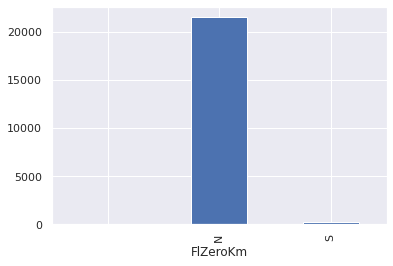

In [ ]:
df.groupby(by='FlZeroKm').ID.count().plot(kind='bar')

In [ ]:
df_model = df.dropna().reset_index()

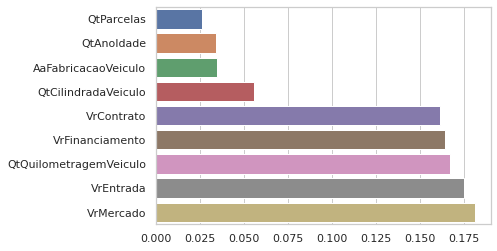

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

num_cols = ['VrContrato','VrFinanciamento','VrEntrada','QtParcelas','AaFabricacaoVeiculo','VrMercado','QtCilindradaVeiculo','QtQuilometragemVeiculo','QtAnoIdade']

df_x = df_model[num_cols]
df_y = df_model['fl_renovou']
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1, random_state=42)
model = DecisionTreeClassifier().fit(X_train,y_train)
f_imp = model.feature_importances_

f_imp_dict = {k: v for k, v in sorted({num_cols[x]:f_imp[x] for x in range(0,len(num_cols))}.items(), key=lambda item: item[1])}

sns.set_theme(style="whitegrid")
ax = sns.barplot(x=list(f_imp_dict.values()), y=list(f_imp_dict.keys()), orient = 'h')

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score
y_pred = model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
f1_score = f1_score(y_test,y_pred)
print(f'TN = {tn},\nFP = {fp},\nFN = {fn},\nTP = {tp},\nF1 = {f1_score}')

TN = 4519,
FP = 165,
FN = 146,
TP = 9,
F1 = 0.0547112462006079


In [ ]:
# The following two lines are only necessary to run once.
# Comment out otherwise for speed-up.
from google.cloud.bigquery import Client, QueryJobConfig
client = Client()

query = """SELECT 
fl_renovou,
duracao_segundos,
VrRenda,
Grupo_Etario,
CdUfNaturalidade,
QtAnoIdade
FROM `hacka-1.dataset.view_dados_hacka`
"""

#Capacidade_de_Pagamento_3,
#Capacidade_de_Pagamento_4,
#Capacidade_de_Pagamento_5,
#Capacidade_de_Pagamento_6,
#Capacidade_de_Pagamento_7,
#ID, NmMotivoContratoFinanceiro,
#Sub_Produto,
#QtAnoIdade, 
#NV_D1_EMPATIA_3m,
#NV_D1_EMPATIA_6m
#where fl_renovou=1
# NV_FC_NEGOCIACAO_COM_SUCESSO_6m,
# NV_FC_NEGOCIACAO_COM_SUCESSO_3m,
#NV_D1_EMPATIA_3m,
#NV_D1_EMPATIA_6m,
#CX_Cortesia_3m,
#CX_Cortesia_6m,
#CX_Cancelamento_6m,
#CX_Oferta_6m,
#VrContrato,
#VrFinanciamento,
#VrEntrada,
#VrMercado,
#QtParcelas,
#FlZeroKm,
#QtCilindradaVeiculo,
#AaFabricacaoVeiculo,
#CdMarca,
#CdOcupacaoCBO,
#QtQuilometragemVeiculo,

job = client.query(query)
df = job.to_dataframe()

NameError: name 'plt' is not defined

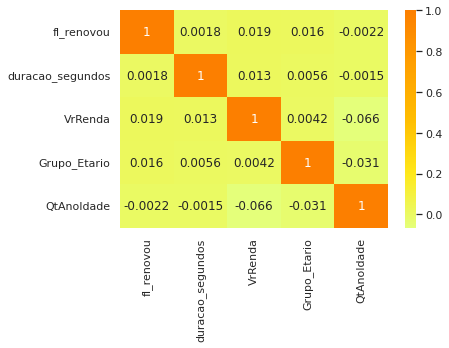

In [ ]:
sns.heatmap(df.corr(), cmap = 'Wistia', annot = True)
plt.show()

In [341]:
# The following two lines are only necessary to run once.
# Comment out otherwise for speed-up.
from google.cloud.bigquery import Client, QueryJobConfig
client = Client()

query = """SELECT
*
FROM `hacka-1.dataset.view_dados_hacka`
WHERE Sub_Produto in ('CDC VEICULOS DE PASSEIO','PRE APROVADO CDC VEICULOS DE PASSEIO','REFINANCIAMENTO VEICULOS DE PASSEIO')
AND QtParcelas in (24, 36, 48, 54, 60)
AND QtCilindradaVeiculo > 995
AND QtCilindradaVeiculo < 3000
AND QtQuilometragemVeiculo < 150000
AND AaFabricacaoVeiculo >= 2008
AND AaFabricacaoVeiculo <= 2019
AND CX_Busca_Informacoes_6m is not null
"""

#ID,
#fl_renovou,
#CX_Busca_Informacoes_6m,
#NV_CX_Atendimento_Diferenciado_6m, 
#GC_OfertaNegociacao_3m

#where (CdOcupacaoCBO = '2684' OR CdOcupacaoCBO = '7897' OR CdOcupacaoCBO = '5411')
#and (CdUfNaturalidade = 'Sudeste' OR CdUfNaturalidade = 'Nordeste')
#and (CdMarca = 'VOLKSWAGEN' OR CdMarca = 'CHEVROLET' OR CdMarca = 'FIAT')
#ID, 
#PL_Sem_Condicoes_3m,
#PL_Sem_Condicoes_6m,
#NmMotivoContratoFinanceiro,
#CdUfNaturalidade,
#Grupo_Etario,
#VrRenda,
#Sub_Produto,
#flmat30conta,
#VrContrato,
#VrFinanciamento,
#VrEntrada,
#QtParcelas,
#AaFabricacaoVeiculo,
#CdMarca,
#VrMercado,
#FlZeroKm,
#QtCilindradaVeiculo,
#QtQuilometragemVeiculo,
#CdOcupacaoCBO,
#QtAnoIdade, 
#fl_renovou,
#duracao_segundos 
#and (CdMarca = 'VOLKSWAGEN')
# OR CdOcupacaoCBO = '7897' OR CdOcupacaoCBO = '5411'
# OR CdUfNaturalidade = 'Nordeste'

job = client.query(query)
df = job.to_dataframe()

In [314]:
df.shape

(837, 4)

In [342]:
df.head()

,ID,Capacidade_de_Pagamento_7,tempo_desde_primeiro_contrato,tempo_desde_ultimo_contrato,QTD_SEGURO,QTD_OUTROS,QTD_CP_CONSIGNADO,QTD_CDCCG,QTD_CONTA_DIGITAL,QTD_CARTAO,...,GC_OfertaNegociacao_3m,CD_Boleto_3m,CX_Cliente_NaoCompreende_3m,PL_Sem_Condicoes_3m,NV_DC10_Cliente_alega_pagamento_3m,NV_FC_NEGOCIACAO_COM_SUCESSO_3m,NV_BP4_Informa_o_desconto_3m,Duracao_segundos,fl_renovou,VrFinanciamento
0,130,8,247.0,246.0,7,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-0.691800
1,290,4,4003.0,252.0,4,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.045869
2,425,8,470.0,220.0,4,0,0,1,0,1,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0,1.245162
3,498,3,306.0,253.0,4,0,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132.0,1,-0.738553
4,858,8,262.0,195.0,7,0,0,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0,-0.944490


In [ ]:
df.count()/len(df.index)

ID                            1.000000
NmMotivoContratoFinanceiro    1.000000
CdUfNaturalidade              1.000000
Grupo_Etario                  1.000000
VrRenda                       0.999142
Sub_Produto                   1.000000
VrContrato                    1.000000
VrFinanciamento               1.000000
VrEntrada                     0.997582
QtParcelas                    1.000000
AaFabricacaoVeiculo           0.999688
CdMarca                       1.000000
VrMercado                     0.999922
FlZeroKm                      1.000000
QtCilindradaVeiculo           0.998986
QtQuilometragemVeiculo        0.975201
CdOcupacaoCBO                 1.000000
QtAnoIdade                    0.999688
fl_renovou                    1.000000
duracao_segundos              0.416517
dtype: float64

In [321]:
df_subprod = df.groupby(by=['CX_Busca_Informacoes_6m','fl_renovou']).ID.count().unstack().reset_index()
df_subprod['perc'] = df_subprod[1]/(df_subprod[0]+df_subprod[1])*100
df_subprod

#fl_renovou	FL_KIDS_F1	0	1	perc
#0	0.0	19646	745	3.653573
#1	1.0	585	39	6.250000 > OBS. A porcentagem de renovações é o dobro quando tem criança no nível 

#fl_renovou	FL_MATERIAL_DE_CONSTRUCAO_F1	0	1	perc
#0	0.0	19150	712	3.584735
#1	1.0	1113	74	6.234204

fl_renovou,CX_Busca_Informacoes_6m,0,1,perc
0,1.0,826,11,1.314217


In [283]:
df_subprod = df.groupby(by=['CdMarca','fl_renovou']).ID.count().unstack().reset_index()
df_subprod['perc'] = df_subprod[1]/(df_subprod[0]+df_subprod[1])*100
df_subprod

fl_renovou,CdMarca,0,1,perc
0,CHEVROLET,1910,111,5.492331
1,FIAT,2005,64,3.093282
2,VOLKSWAGEN,2839,84,2.873760


<AxesSubplot:xlabel='CdMarca'>

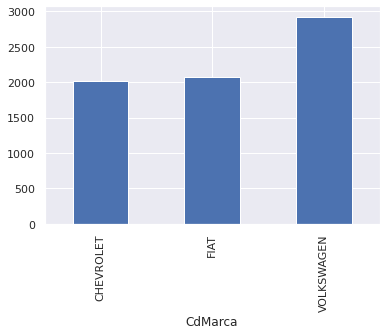

In [284]:
df.groupby(by='CdMarca').ID.count().plot(kind='bar')

In [324]:
df_subprod = df.groupby(by=['CdMarca','fl_renovou']).ID.count().unstack().reset_index()
df_subprod['perc'] = df_subprod[1]/(df_subprod[0]+df_subprod[1])*100
df_subprod

fl_renovou,CdMarca,0,1,perc
0,,1.0,NaN,NaN
1,CHEVROLET,109.0,2.0,1.801802
2,CITROEN,47.0,NaN,NaN
3,FIAT,107.0,NaN,NaN
4,FORD,54.0,1.0,1.818182
5,HONDA,43.0,1.0,2.272727
6,HYUNDAI,79.0,1.0,1.250000
7,JEEP,10.0,NaN,NaN
8,KIA,10.0,NaN,NaN
9,MERCEDES-BENZ,1.0,NaN,NaN


In [286]:
df_subprod = df.groupby(by=['QtParcelas','fl_renovou']).ID.count().unstack().reset_index()
df_subprod['perc'] = df_subprod[1]/(df_subprod[0]+df_subprod[1])*100
df_subprod

fl_renovou,QtParcelas,0,1,perc
0,12,1.0,NaN,NaN
1,13,15.0,NaN,NaN
2,14,15.0,2.0,11.764706
3,15,1.0,NaN,NaN
4,17,2.0,NaN,NaN
5,20,1.0,NaN,NaN
6,24,198.0,14.0,6.603774
7,25,7.0,NaN,NaN
8,26,4.0,1.0,20.000000
9,27,5.0,NaN,NaN


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


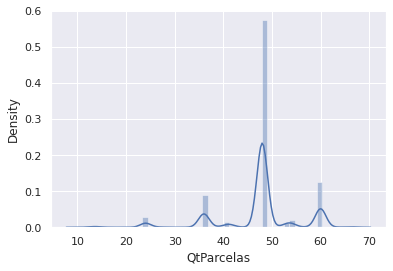

In [ ]:
import seaborn as sns, numpy as np
sns.set_theme(); np.random.seed(0)
x = df.QtParcelas
ax = sns.distplot(x)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


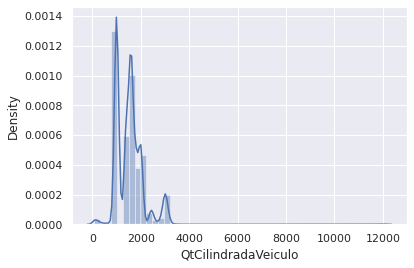

In [ ]:
x = df.QtCilindradaVeiculo
ax = sns.distplot(x)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


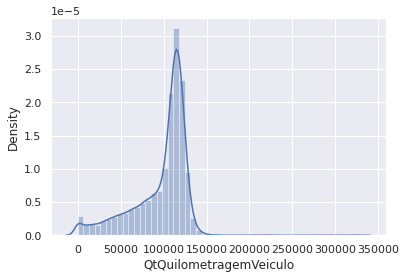

In [ ]:
x = df.QtQuilometragemVeiculo
ax = sns.distplot(x)

<AxesSubplot:xlabel='QtAnoIdade'>

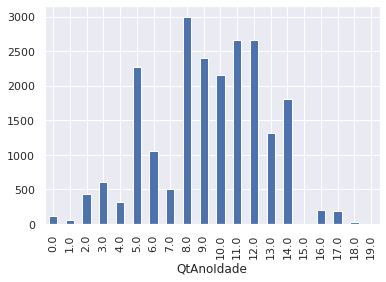

In [ ]:
df.groupby(by='QtAnoIdade').ID.count().plot(kind='bar')

<AxesSubplot:xlabel='AaFabricacaoVeiculo'>

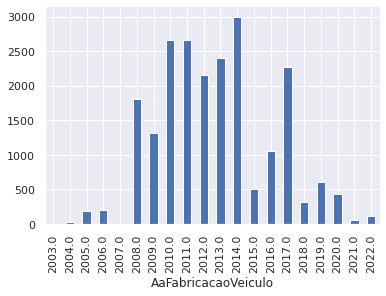

In [ ]:
df.groupby(by='AaFabricacaoVeiculo').ID.count().plot(kind='bar')

<AxesSubplot:xlabel='CdMarca'>

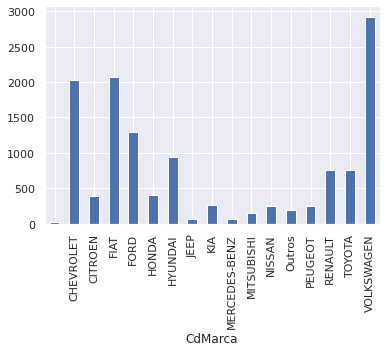

In [ ]:
df.groupby(by=['CdMarca']).ID.count().plot(kind='bar')

<AxesSubplot:xlabel='Sub_Produto'>

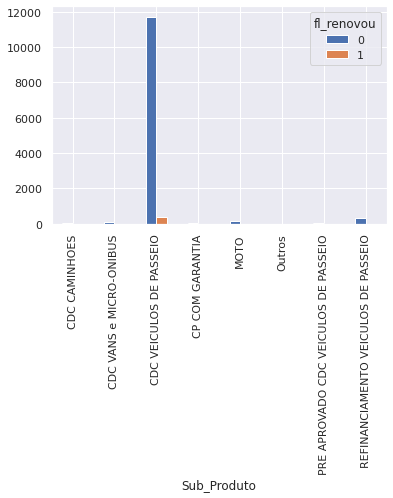

In [ ]:
df.groupby(by=['Sub_Produto', 'fl_renovou']).ID.count().unstack().plot(kind='bar')

<AxesSubplot:xlabel='FlZeroKm'>

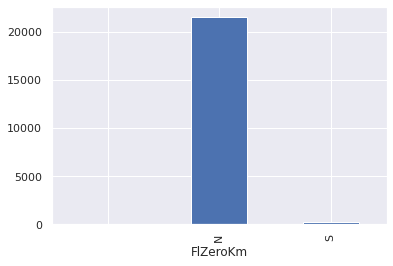

In [ ]:
df.groupby(by='FlZeroKm').ID.count().plot(kind='bar')

In [ ]:
df_model = df.dropna().reset_index()

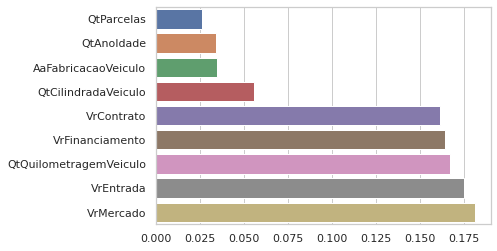

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

num_cols = ['VrContrato','VrFinanciamento','VrEntrada','QtParcelas','AaFabricacaoVeiculo','VrMercado','QtCilindradaVeiculo','QtQuilometragemVeiculo','QtAnoIdade']

df_x = df_model[num_cols]
df_y = df_model['fl_renovou']
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1, random_state=42)
model = DecisionTreeClassifier().fit(X_train,y_train)
f_imp = model.feature_importances_

f_imp_dict = {k: v for k, v in sorted({num_cols[x]:f_imp[x] for x in range(0,len(num_cols))}.items(), key=lambda item: item[1])}

sns.set_theme(style="whitegrid")
ax = sns.barplot(x=list(f_imp_dict.values()), y=list(f_imp_dict.keys()), orient = 'h')

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score
y_pred = model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
f1_score = f1_score(y_test,y_pred)
print(f'TN = {tn},\nFP = {fp},\nFN = {fn},\nTP = {tp},\nF1 = {f1_score}')

TN = 4519,
FP = 165,
FN = 146,
TP = 9,
F1 = 0.0547112462006079


In [ ]:
# The following two lines are only necessary to run once.
# Comment out otherwise for speed-up.
from google.cloud.bigquery import Client, QueryJobConfig
client = Client()

query = """SELECT 
fl_renovou,
duracao_segundos,
VrRenda,
Grupo_Etario,
CdUfNaturalidade,
QtAnoIdade
FROM `hacka-1.dataset.view_dados_hacka`
"""

#Capacidade_de_Pagamento_3,
#Capacidade_de_Pagamento_4,
#Capacidade_de_Pagamento_5,
#Capacidade_de_Pagamento_6,
#Capacidade_de_Pagamento_7,
#ID, NmMotivoContratoFinanceiro,
#Sub_Produto,
#QtAnoIdade, 
#NV_D1_EMPATIA_3m,
#NV_D1_EMPATIA_6m
#where fl_renovou=1
# NV_FC_NEGOCIACAO_COM_SUCESSO_6m,
# NV_FC_NEGOCIACAO_COM_SUCESSO_3m,
#NV_D1_EMPATIA_3m,
#NV_D1_EMPATIA_6m,
#CX_Cortesia_3m,
#CX_Cortesia_6m,
#CX_Cancelamento_6m,
#CX_Oferta_6m,
#VrContrato,
#VrFinanciamento,
#VrEntrada,
#VrMercado,
#QtParcelas,
#FlZeroKm,
#QtCilindradaVeiculo,
#AaFabricacaoVeiculo,
#CdMarca,
#CdOcupacaoCBO,
#QtQuilometragemVeiculo,

job = client.query(query)
df = job.to_dataframe()

NameError: name 'plt' is not defined

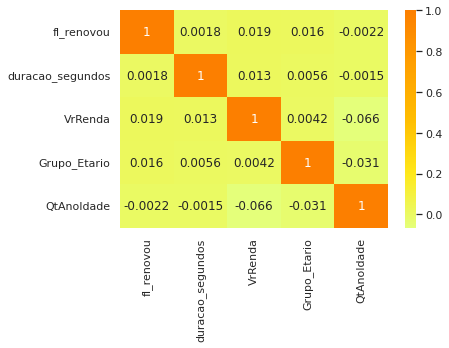

In [ ]:
sns.heatmap(df.corr(), cmap = 'Wistia', annot = True)
plt.show()